In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read in the data
df = pd.read_csv('hw04_data.csv',names=['Exam1','Exam2','Admitted'])
df.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [49]:
df.shape

(100, 3)

In [4]:
# checking for data types
df.dtypes

Exam1       float64
Exam2       float64
Admitted      int64
dtype: object

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam1     100 non-null    float64
 1   Exam2     100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## Data Cleaning

In [45]:
# 1.check for missing values
df.isna().sum()

Exam1       0
Exam2       0
Admitted    0
dtype: int64

In [46]:
# 2. check for duplicates
df.duplicated().sum()

0

<AxesSubplot:>

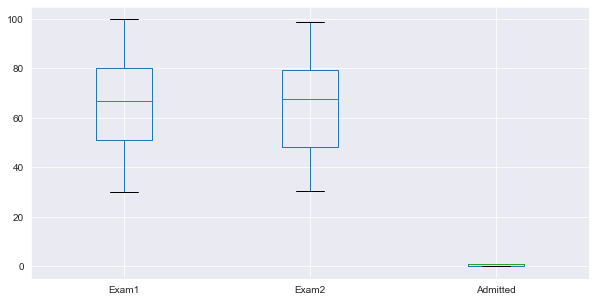

In [47]:
# 3. check for outliers
df.boxplot(figsize=(10,5))

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Admitted'] = le.fit_transform(df['Admitted'])

In [50]:
# splitting the data into X and y
X = df.drop("Admitted", axis=1)
y = df["Admitted"]

In [6]:
# splitting the data into X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Exploratory Data Analysis

## Visualization

In [7]:
sns.set_style('darkgrid')

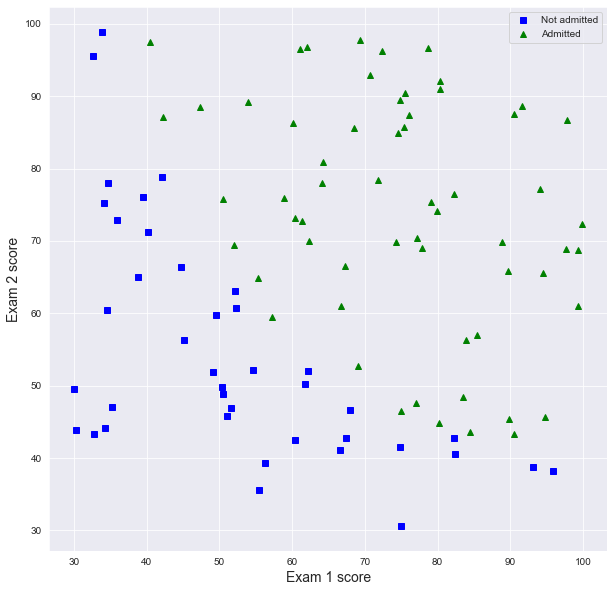

In [8]:
plt.figure(figsize=(10, 10))
# Plot the data for the “Not admitted” entries
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not admitted")
# Plot the data for the “Admitted” entries with the style of green triangles.
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = "Admitted")
# You need to complete the code here
plt.legend(loc="best")
# Add labels for the coordinates
plt.xlabel("Exam 1 score", fontsize=14)
plt.ylabel("Exam 2 score",fontsize=14)
# You need to complete the code here
plt.show()


## checking for class imbalance

In [9]:
df.Admitted.value_counts()

1    60
0    40
Name: Admitted, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [48]:
# Oversampling the minority class
#sm = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = sm.fit_resample(X, y)

## Modelling

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
# Split the data into training and test sets 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [15]:
# Modelling 
log_reg =  LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression()

Accuracy: 
 0.8

Confusion Matrix: 
 [[7 1]
 [3 9]]

ROC Curve: 

ROC AUC Score: 
 0.8125

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



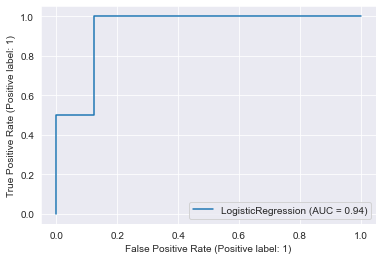

In [28]:
# evaluate the model
y_pred = log_reg.predict(X_test)

from sklearn.metrics import *

# Accuracy
print("Accuracy: \n", accuracy_score(y_test, y_pred))

# confusion matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

# roc curve
print("\nROC Curve: \n", plot_roc_curve(log_reg, X_test, y_test))

# roc_auc_score
print("\nROC AUC Score: \n", roc_auc_score(y_test, y_pred))

# classification report
print("\nClassification Report: \n", classification_report(y_test, y_pred))

By default, the arrangement of the confusion matrix in sklearn is as follows:<br>
$\begin{bmatrix} TN & FP \\ FN & TP \end{bmatrix}$

#### Visualizing the decision boundary

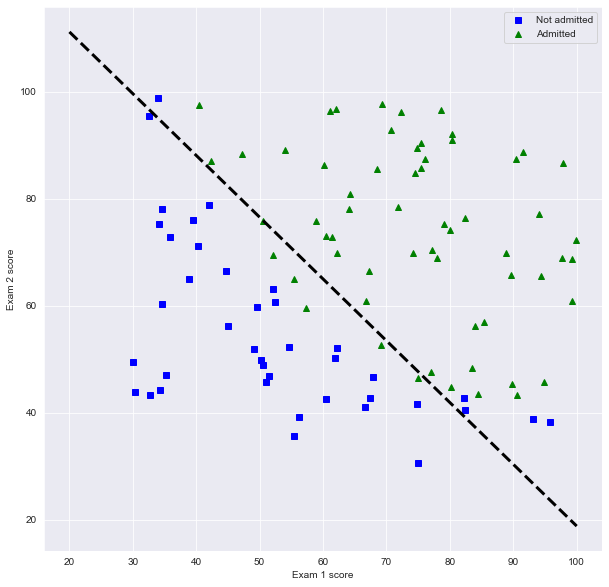

In [16]:
plt.figure(figsize=(10, 10))
# Plot the data for the “Not admitted” entries
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not admitted")
# Plot the data for the “Admitted” entries with the style of green triangles.
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = "Admitted")
# You need to complete the code here
plt.legend(loc="best")
# Add labels for the coordinates
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
# You need to complete the code here
# visualizing the decision boundary
left_right = np.array([20, 100])
# If you save your model to a variable other than “log_reg”, you need to update the following command accordingly.
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.show()

No the decision boundary does not perfectly separate the two classes. There are some points that are misclassified.

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 
 0.8

Confusion Matrix: 
 [[7 1]
 [3 9]]

ROC Curve: 

ROC AUC Score: 
 0.8125

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



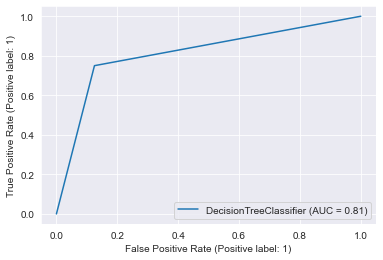

In [36]:
# evaluate the model
from sklearn.metrics import *
y_pred_tree = Dtree.predict(X_test)

# Accuracy
print("Accuracy: \n", accuracy_score(y_test, y_pred_tree))

# confusion matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_tree))

# roc curve
print("\nROC Curve: \n", plot_roc_curve(Dtree, X_test, y_test))

# roc_auc_score
print("\nROC AUC Score: \n", roc_auc_score(y_test, y_pred_tree))

# classification report
print("\nClassification Report: \n", classification_report(y_test, y_pred_tree))

In [30]:
# decision tree model tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(estimator = Dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12; total time=   0.0s
[CV] END cri

In [32]:
print(grid.best_score_)
print(grid.best_params_)

0.9007597340930674
{'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 12}


In [33]:
# Decision Tree with best parameters
Dtree_tuned = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12)
Dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=2, min_samples_leaf=4,
                       min_samples_split=12)

Accuracy: 
 0.8

Confusion Matrix: 
 [[7 1]
 [3 9]]

ROC Curve: 

ROC AUC Score: 
 0.8125

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



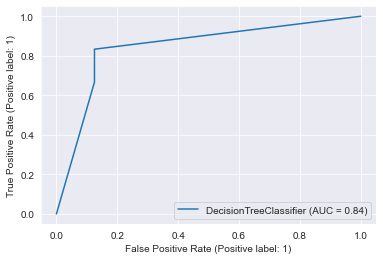

In [35]:
# evaluate the model
y_pred_tree_tuned = Dtree_tuned.predict(X_test)

# Accuracy
print("Accuracy: \n", accuracy_score(y_test, y_pred_tree_tuned))

# confusion matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_tree_tuned))

# roc curve
print("\nROC Curve: \n", plot_roc_curve(Dtree_tuned, X_test, y_test))

# roc_auc_score
print("\nROC AUC Score: \n", roc_auc_score(y_test, y_pred_tree_tuned))

# classification report
print("\nClassification Report: \n", classification_report(y_test, y_pred_tree_tuned))


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

Rforest = RandomForestClassifier()
Rforest.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 
 0.85

Confusion Matrix: 
 [[8 0]
 [3 9]]

ROC Curve: 

ROC AUC Score: 
 0.875

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.75      0.86        12

    accuracy                           0.85        20
   macro avg       0.86      0.88      0.85        20
weighted avg       0.89      0.85      0.85        20



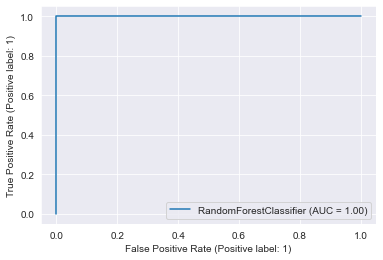

In [39]:
# evaluate the model
y_pred_forest = Rforest.predict(X_test)

# Accuracy
print("Accuracy: \n", accuracy_score(y_test, y_pred_forest))

# confusion matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_forest))

# roc curve
print("\nROC Curve: \n", plot_roc_curve(Rforest, X_test, y_test))

# roc_auc_score
print("\nROC AUC Score: \n", roc_auc_score(y_test, y_pred_forest))

# classification report
print("\nClassification Report: \n", classification_report(y_test, y_pred_forest))

In [ ]:
# Random Forest model tuning

param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    
}

grid_forest = GridSearchCV(estimator = Rforest, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_forest.fit(X_train, y_train)

In [41]:
# print best parameter after tuning
print(grid_forest.best_score_)
print(grid_forest.best_params_)

0.9377967711301044
{'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [42]:
# Random Forest with best parameters
Rforest_tuned = RandomForestClassifier(criterion='gini', max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10)
Rforest_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=3,
                       min_samples_split=10)

Accuracy: 
 0.75

Confusion Matrix: 
 [[7 1]
 [4 8]]

ROC Curve: 

ROC AUC Score: 
 0.7708333333333333

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.89      0.67      0.76        12

    accuracy                           0.75        20
   macro avg       0.76      0.77      0.75        20
weighted avg       0.79      0.75      0.75        20



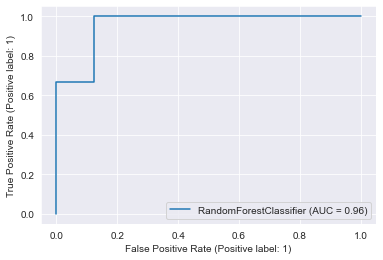

In [43]:
y_pred_forest_tuned = Rforest_tuned.predict(X_test)

# Accuracy
print("Accuracy: \n", accuracy_score(y_test, y_pred_forest_tuned))

# confusion matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_forest_tuned))

# roc curve
print("\nROC Curve: \n", plot_roc_curve(Rforest_tuned, X_test, y_test))

# roc_auc_score
print("\nROC AUC Score: \n", roc_auc_score(y_test, y_pred_forest_tuned))

# classification report
print("\nClassification Report: \n", classification_report(y_test, y_pred_forest_tuned))


## KNN Classifier

In [ ]:
from sklearn.model_selection import KNN

## Evaluation

In [15]:
# predicting when given a student with 45 in Exam 1 and 85 in Exam 2
log_reg.predict([[45, 85]])

array([1])

In [51]:
log_reg.predict_proba([[45, 85]])

array([[0.35538061, 0.64461939]])

In [16]:
# print the probabilties of the student being admitted 
print("probability of Student not being admitted ",log_reg.predict_proba([[45, 85]])[0][0])
print("probability of Student being admitted ",log_reg.predict_proba([[45, 85]])[0][1])

probability of Student not being admitted  0.35538061042393776
probability of Student being admitted  0.6446193895760622


In [17]:
# Predicting the test set results
y_pred = log_reg.predict(X_test)
y_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# score of the model
log_reg.score(X_test, y_test)

0.8

In [19]:
# visualization with confusion matrix
from sklearn.metrics import confusion_matrix
cm_matrix = confusion_matrix(y_test, y_pred)
cm_matrix

array([[7, 1],
       [3, 9]])

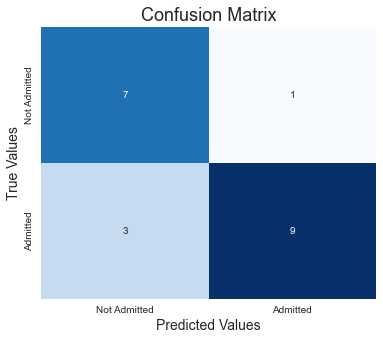

In [20]:
# visualizing the confusion matrix
fig , ax = plt.subplots(figsize=(6,5))
#labels = ['True Neg','False Pos','False Neg','True Pos']
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues',ax=ax, 
xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'], cbar=False)

plt.title('Confusion Matrix',fontsize=18)
plt.xlabel('Predicted Values',fontsize=14)
plt.ylabel('True Values',fontsize=14)
plt.show()

##### Formula for Accuracy is given by $$\frac{TP+TN}{TP+TN+FP+FN}$$

In [21]:
# calculate the accuracy
accuracy = (cm_matrix[0][0] + cm_matrix[1][1]) / (cm_matrix[0][0] + cm_matrix[0][1] + cm_matrix[1][0] + cm_matrix[1][1])
accuracy

0.8

##### Formula for Precision is given by $$\frac{TP}{TP+FP}$$

In [22]:
# calculate the precision
precision = cm_matrix[1][1] / (cm_matrix[1][1] + cm_matrix[0][1])
precision

0.9

##### Formula for Recall is given by $$\frac{TP}{TP+FN}$$

In [23]:
# calculate the recall
recall = cm_matrix[1][1] / (cm_matrix[1][1] + cm_matrix[1][0])
recall

0.75

#### F1 score formula is given by $$\frac{2*Precision*Recall}{Precision+Recall}$$

In [24]:
# calculate the F1 score
f1_score = 2 * (precision * accuracy) / (precision + accuracy)
f1_score

0.8470588235294118

## Analysis

##### a. What do you think about the performance of this model?

In [30]:
# The model performs relatively well with very high accuracy of 0.85, precision of 0.9 and recall of 0.75. The F1 score is also high with 0.85.

##### b. Do you think the linear decision boundary fits the model?

In [28]:
# The linear decision boundary is not a perfect fit for the data. 
# The data is not linearly separable.

##### c. What could you do to improve the performance of the model?

In [29]:
# The model could be tuned by using regularization to reduce overfitting.
# Other models could be used to see if they perform better.